In [21]:
import pandas as pd
import numpy as np



In [2]:
df=pd.read_csv("/content/insurance - insurance.csv")

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Cluster
0,19,0,27.900,0,0,3,16884.92400,0
1,18,1,33.770,1,1,2,1725.55230,0
2,28,1,33.000,3,1,2,4449.46200,0
3,33,1,22.705,0,1,1,21984.47061,2
4,32,1,28.880,0,1,1,3866.85520,0


In [23]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
Cluster,0


In [24]:
from sklearn.preprocessing import LabelEncoder


In [25]:
lb=LabelEncoder()

In [26]:
x=df.iloc[:,[0,1]].values

In [27]:
df["sex"]=lb.fit_transform(df['sex'])
df["smoker"]=lb.fit_transform(df['sex'])
df["region"]=lb.fit_transform(df['region'])

In [28]:
x=df.drop(columns=["charges"])
y=df["charges"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2,
random_state=42)

In [31]:
x=df.iloc[:,[0,1]].values

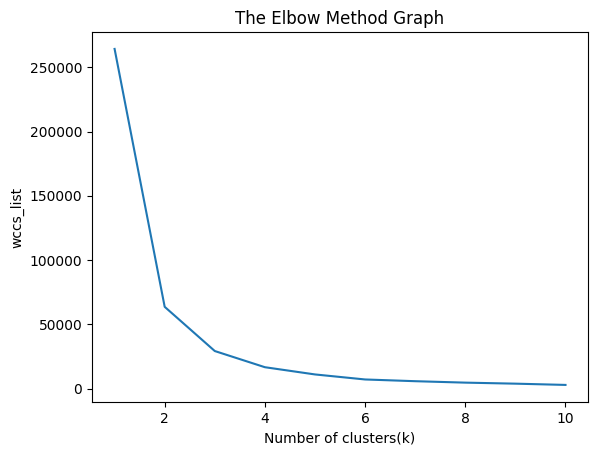

In [32]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

a=[]

for i in range(1,11):
    b=KMeans(n_clusters=i,init="k-means++",random_state=42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11) , a)

plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wccs_list")
plt.show()

In [33]:
b=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_predict=b.fit_predict(x)

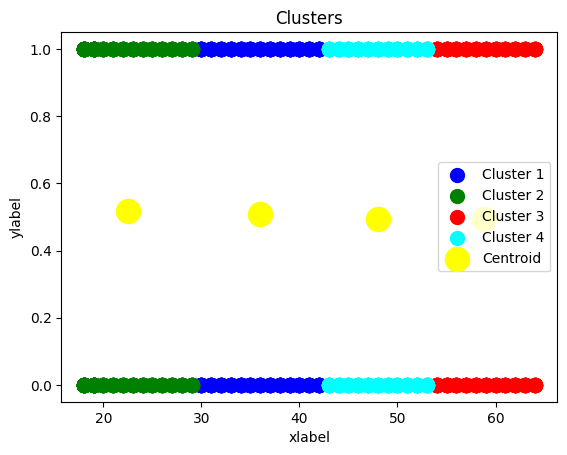

In [34]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroid')

plt.title('Clusters')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.show()


   age  sex     bmi  children  smoker  region      charges  Cluster
0   19    0  27.900         0       0       3  16884.92400        0
1   18    1  33.770         1       1       2   1725.55230        0
2   28    1  33.000         3       1       2   4449.46200        0
3   33    1  22.705         0       1       1  21984.47061        1
4   32    1  28.880         0       1       1   3866.85520        0


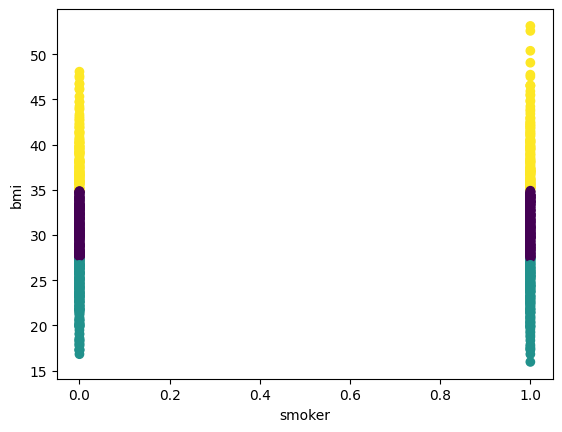

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X = df[['smoker', 'bmi']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

print(df.head())

plt.scatter(X['smoker'], X['bmi'], c=df['Cluster'])
plt.xlabel('smoker')
plt.ylabel('bmi')
plt.show()


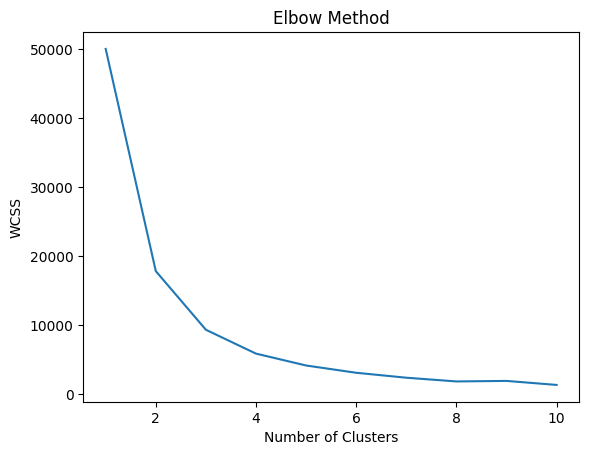

In [36]:
lst = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    lst.append(kmeans.inertia_)

plt.plot(range(1,11), lst)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
